In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("automobileEDA.csv", header=0)

In [7]:
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


<h2>1. Linear Regression and Multiple Linear Regression</h2>


<h4>Linear Regression</h4>


<p>One example of a Data  Model that we will be using is:</p>
<b>Simple Linear Regression</b>

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>


$$
Y: Response \ Variable\\\\\\\\\\\\
X: Predictor \ Variables
$$


<b>Linear Function</b>
$$
Yhat = a + b  X
$$


<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>


<h4>Let's load the modules for linear regression:</h4>


In [8]:
from sklearn.linear_model import LinearRegression

In [10]:
lm = LinearRegression()
lm

LinearRegression()

<h4>How could "highway-mpg" help us predict car price?</h4>


For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [11]:
X = df[['highway-mpg']]
Y = df['price']

In [12]:
#Fit the linear model using highway-mpg:

lm.fit(X,Y)

LinearRegression()

In [13]:
# we can output a prediction

Yhat=lm.predict(X)

In [14]:
lm.intercept_

38423.305858157386

In [15]:
# slope
lm.coef_

array([-821.73337832])

What is the final estimated linear model we get?
As we saw above, we should get a final linear model with the structure:
    $$
Yhat = a + b  X
$$
Price = 38423.31 - 821.73 x highway-mpg

Multiple Linear Regression

What if we want to predict car price using more than one variable?


If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:



The equation is given by:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$


<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.


In [17]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [19]:
lm.fit(Z,df["price"])

LinearRegression()

In [20]:
lm.intercept_

-15806.624626329227

In [22]:
#slope
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

Price = -15806.62462632918 + 53.49574423 x horsepower + 4.70770099 x curb-weight + 81.53026382 x engine-size + 36.05748882 x highway-mpg

In [ ]:
#Model Evaluation Using Visualization
# Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.

# Import the visualization package, seaborn:

In [23]:
import seaborn as sns
%matplotlib inline 

In [ ]:
#Regression Plot
#When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.

#This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

#Let's visualize highway-mpg as potential predictor variable of price:

(0.0, 48160.55678181255)

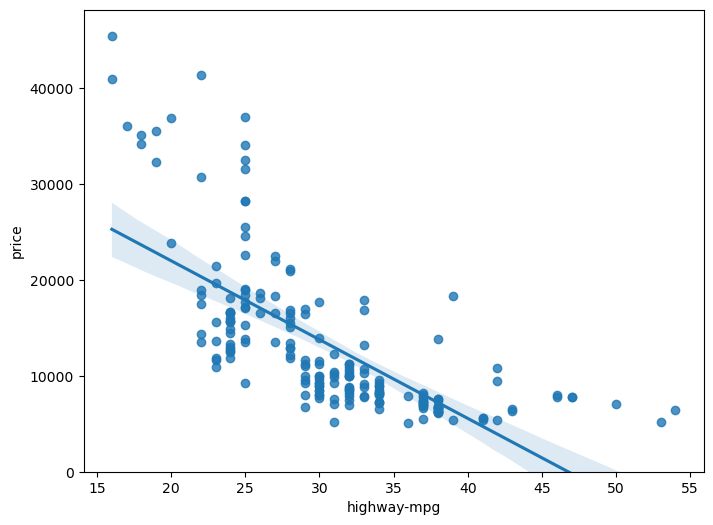

In [26]:
plt.figure(figsize=(8,6))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [ ]:
# We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

# One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points
# are around the regression line. This will give you a good indication of the variance of the data and whether 
# a linear model would be the best fit or not. If the data is too far off from the line, this linear model might 
# not be the best model for this data.

# # Let's compare this plot to the regression plot of "peak-rpm".

(0.0, 47414.1)

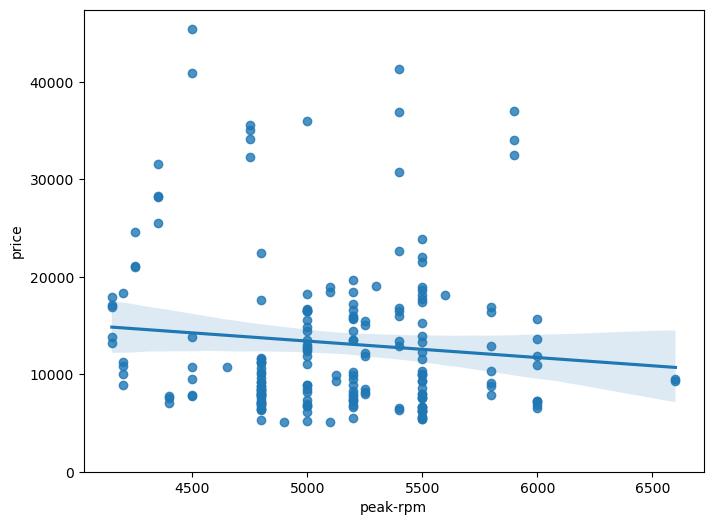

In [25]:
plt.figure(figsize=(8,6))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [ ]:
# Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer
# to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line
# and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

In [27]:
df[["peak-rpm" ,"highway-mpg" , "price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


In [ ]:
# The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692
# compared to "peak-rpm" which is approximate -0.101616.

In [ ]:
# Residual Plot
# A good way to visualize the variance of the data is to use a residual plot.

# What is a residual?

# The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

# So what is a residual plot?

# A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

# What do we pay attention to when looking at a residual plot?

# We look at the spread of the residuals:

# - If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

# Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

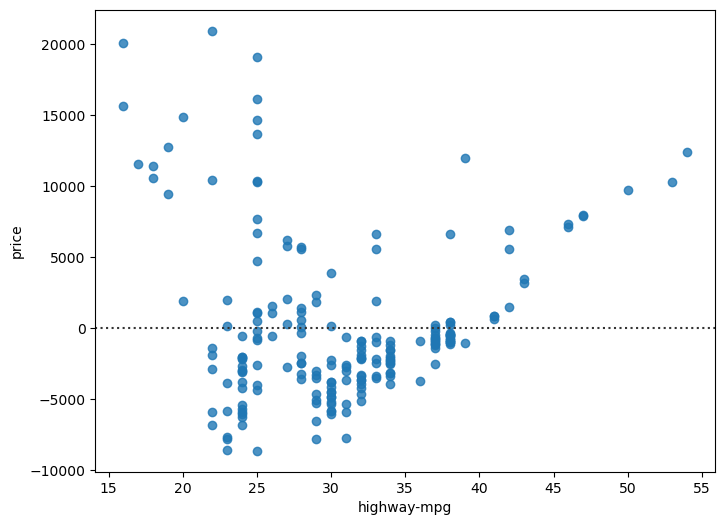

In [30]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

In [ ]:
# What is this plot telling us?

# We can see from this residual plot that the residuals are not randomly spread around the x-axis, 
# leading us to believe that maybe a non-linear model is more appropriate for this data.

In [31]:
# Multiple Linear Regression
# How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

# One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

# First, let's make a prediction:



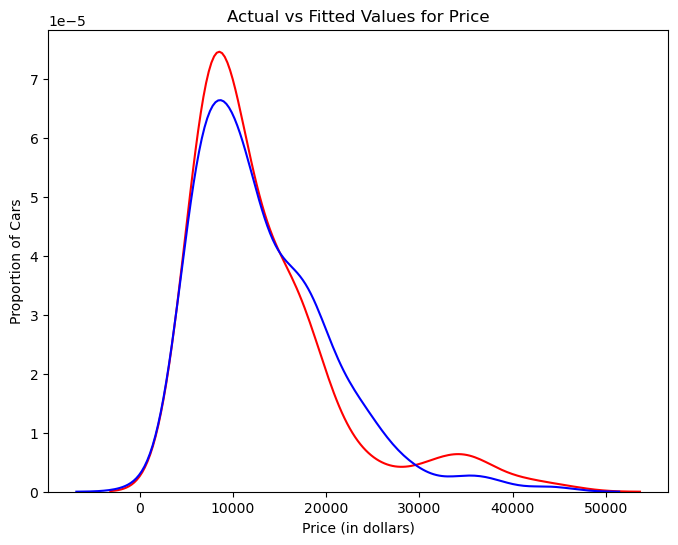

In [38]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [ ]:
# We can see that the fitted values are reasonably close to the actual values
# since the two distributions overlap a bit. However, there is definitely some room for improvement.

In [ ]:
# 3. Polynomial Regression and Pipelines
# Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

# We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

# There are different orders of polynomial regression:

<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\\\\\\\
$$

<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\\\
$$


In [ ]:
# # We saw earlier that a linear model did not provide the best fit while using "highway-mpg"
# as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

# # We will use the following function to plot the data:

In [33]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [34]:
x = df['highway-mpg']
y = df['price']

In [35]:
# Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


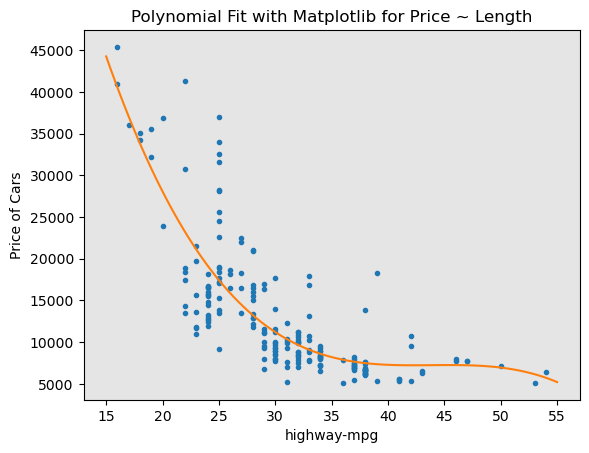

In [36]:
PlotPolly(p, x, y, 'highway-mpg')

In [39]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [ ]:
# We can already see from plotting that this polynomial model performs better than the linear model. 
# This is because the generated polynomial function "hits" more of the data points.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


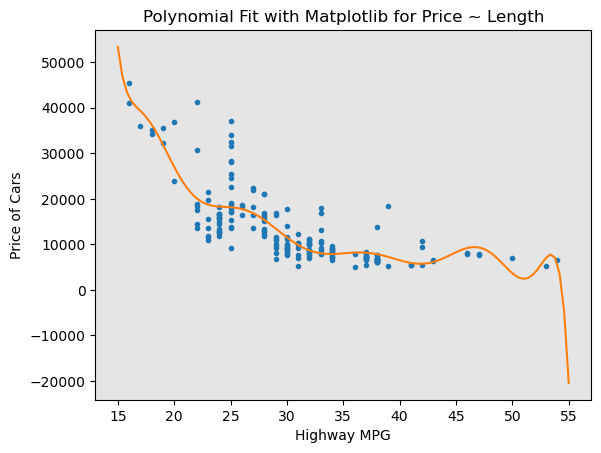

In [40]:
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [ ]:
# #pipeline
# Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline.
# # We also use StandardScaler as a step in our pipeline.

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [ ]:
# # We create the pipeline by creating a list of tuples including the name of the model or estimator and its
# corresponding constructor.

In [45]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [46]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
# First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

# Then, we can normalize the data, perform a transform and fit the model simultaneously.

In [47]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [48]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [49]:
# Write your code below and press Shift+Enter to execute 
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [ ]:
# 4. Measures for In-Sample Evaluation¶
# When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

# Two very important measures that are often used in Statistics to determine the accuracy of a model are:

# R^2 / R-squared
# Mean Squared Error (MSE)
# R-squared

# R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

# The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

# Mean Squared Error (MSE)

# The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).

# Model 1: Simple Linear Regression






# Let's calculate the R^2:

In [50]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


In [ ]:
# The R-square is:  0.4965911884339176
# We can say that ~49.659% of the variation of the price is explained by this simple linear model, which we have built using the highway_mpg data.

# Let's calculate the MSE:

# We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

In [51]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


In [55]:
#multiple linear regression
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [56]:
Y_predict_multifit = lm.predict(Z)

In [57]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [60]:
# polynomial fit

from sklearn.metrics import r2_score

In [61]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906517


In [ ]:
# Decision Making: Determining a Good Model Fit
# Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

# What is a good R-squared value?
# When comparing models, the model with the higher R-squared value is a better fit for the data.

# What is a good MSE?
# When comparing models, the model with the smallest MSE value is a better fit for the data.

# Let's take a look at the values for the different models.
# Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

# R-squared: 0.49659118843391759
# MSE: 3.16 x10^7
# Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

# R-squared: 0.80896354913783497
# MSE: 1.2 x10^7
# Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

# R-squared: 0.6741946663906514
# MSE: 2.05 x 10^7
# Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)
# Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.

# In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

# MSE: The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
# R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).
# This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

# Simple Linear Model (SLR) vs. Polynomial Fit
# MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
# R-squared: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
# Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.

# Multiple Linear Regression (MLR) vs. Polynomial Fit
# MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
# R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.
# Conclusion
# Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.